In [1]:

import cv2
import numpy as np
from matplotlib import pyplot as plt


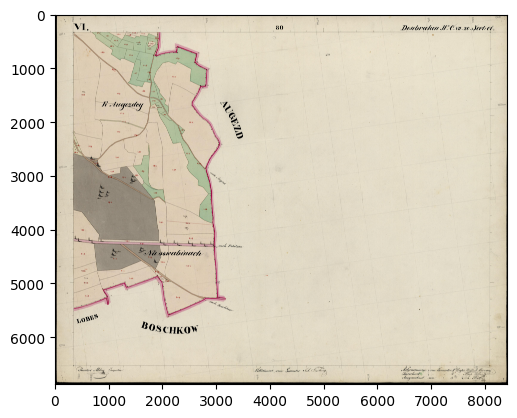

In [17]:

# A command line argument.
input_name = "UAZK-B2-a-04-C-1425-006.JPG"

# It reads the image from the file and converts it to grayscale.
img = cv2.cvtColor(cv2.imread("./data_katastr/" + input_name), cv2.COLOR_BGR2RGB)

assert img is not None, "file could not be read, check with os.path.exists()"
plt.imshow(img)
plt.show()

In [3]:

# A Canny edge detector.
edges = cv2.Canny(img, 1, 500)

# Create default parametrization LSD
lsd = cv2.createLineSegmentDetector(0)

# Detect lines in the image
lines = lsd.detect(img)[0]  # Position 0 of the returned tuple are the detected lines
print(lines.shape)

(10432, 1, 4)


In [31]:

# It creates a white image with the same size as the input image.
white = np.zeros_like(img)
white[:] = 255

In [34]:

# Draw detected lines in the image
drawn_img = lsd.drawSegments(white, lines)
# It converts the image from BGR to grayscale.
drawn_img = cv2.cvtColor(drawn_img, cv2.COLOR_BGR2GRAY)

In [35]:

# Taking the right 90% of the image.
right_border = int(drawn_img.shape[1] * 0.9)
# Taking the left 10% of the image.
left_border = int(drawn_img.shape[1] * 0.1)
# Taking the bottom 90% of the image.
bottom_border = int(drawn_img.shape[0] * 0.9)
# Taking the top 10% of the image.
top_border = int(drawn_img.shape[0] * 0.1)

In [36]:

# Taking the right, left, bottom and top border of the image.
right_border = drawn_img[:, right_border:]
left_border = drawn_img[:, :left_border]
bottom_border = drawn_img[bottom_border:, :]
top_border = drawn_img[:top_border, :]

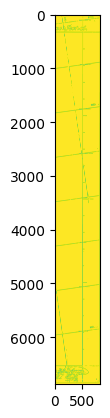

In [43]:

# Showing the image.
plt.imshow(right_border)
plt.show()

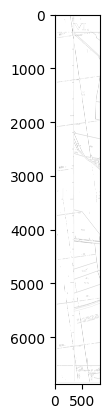

In [38]:

plt.imshow(left_border, cmap='gray')
plt.show()

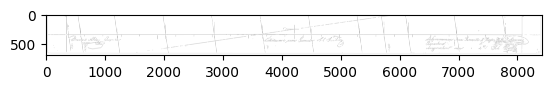

In [39]:

plt.imshow(bottom_border, cmap='gray')
plt.show()

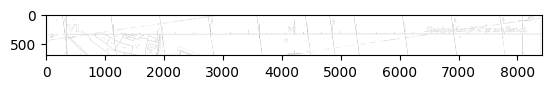

In [40]:

plt.imshow(top_border, cmap='gray')
plt.show()

